In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# adjusting to 0~1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

4431872/4422102 [==============================] - 2s 0us/step


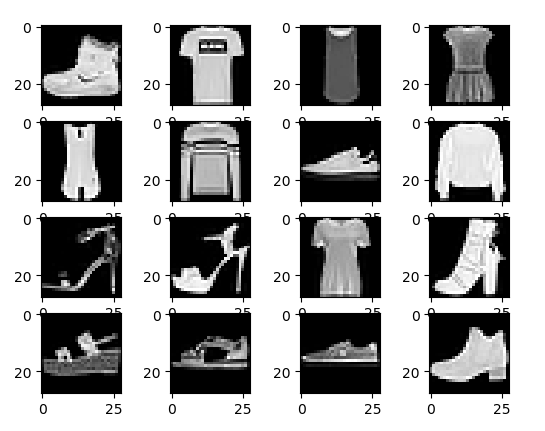
- 출처: https://pasus.tistory.com/18?category=1135403

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
# Model Subclassing API

class MyModel(tf.keras.Model):
    def __init__(self): # 객체가 생성될 때 호출되는 함수
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(kernel_size=(3, 3), 
                                            filters=16, 
                                            activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                                            filters=32, 
                                            activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(kernel_size=(3, 3),
                                            filters=64, 
                                            activation='relu')
        
        self.pool = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(32, activation='relu')
        self.d2 = tf.keras.layers.Dense(10, activation='softmax')
    
    def call(self, x): # 객체 변수를 실행할 때 호출되는 함수
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.d1(x)
        
        return self.d2(x)

model = MyModel()

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5681 - accuracy: 0.7933 - val_loss: 0.4218 - val_accuracy: 0.8445
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3713 - accuracy: 0.8671 - val_loss: 0.3386 - val_accuracy: 0.8761
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3203 - accuracy: 0.8830 - val_loss: 0.3180 - val_accuracy: 0.8853
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2915 - accuracy: 0.8939 - val_loss: 0.3041 - val_accuracy: 0.8885
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2693 - accuracy: 0.9017 - val_loss: 0.2912 - val_accuracy: 0.8944
Epoch 6/10
1407/1407 [==============================] - 11s 7ms/step - loss: 0.2481 - accuracy: 0.9082 - val_loss: 0.2859 - val_accuracy: 0.8963
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2335 - accuracy: 0.9144 - val_loss: 0.2835 - val_ac

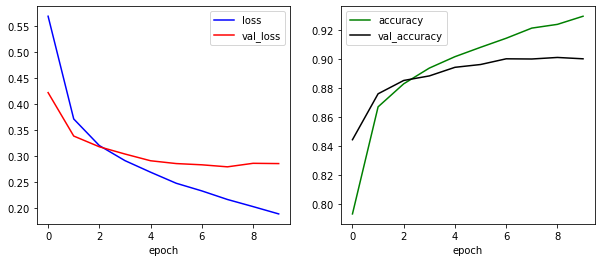

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(test_loss, test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8974
0.294900506734848 0.8974000215530396
